In [1]:
import os 

# Set the working directory to the root of the project
os.chdir(r'C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam')
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam


In [99]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

# Question 1

In [8]:
# import data
dataset = pd.read_csv('data\data_dropna.txt', sep='\t')
# remove the first column (index, not class)
dataset = dataset.iloc[:, 1:]
dataset.head()

,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
0,1,0.146618,-0.843381,0.084083,-1.319645,-0.796130,-0.746654,2.162536,0.661785,-2.026639,...,-1.224754,-0.052719,-1.933023,0.756493,-0.801447,0.535718,0.927770,0.031396,1.388040,0.243790
1,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
2,1,-1.961148,-2.066390,1.157878,2.638431,0.380795,-1.135741,1.407938,0.641110,-0.257362,...,1.388097,0.940432,-3.248729,-1.056628,0.526422,-0.141712,-0.243878,2.261639,-0.178581,0.717398
3,3,-0.288366,1.755972,-1.144203,0.321466,1.399391,0.854409,-1.334523,-0.673844,-0.706075,...,-1.339229,-0.997101,-0.565771,2.662074,-0.520536,0.371094,-0.182359,-2.124540,-0.127067,-0.273763
4,3,2.504740,0.144209,2.255337,0.306778,1.239686,-0.452261,0.057692,1.508914,0.124645,...,1.096542,-0.198090,-0.855567,-0.923564,-0.994823,-1.253920,0.359540,-0.418368,0.423453,1.433150


Divide data into training and testing

In [12]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X shape: (2020, 1000)
y shape: (2020,)


In [16]:
feature_means = np.mean(X_train, axis=0)
feature_stds = np.std(X_train, axis=0)

print(f"min mean: [{np.min(feature_means)}], max mean: [{np.max(feature_means)}]")
print(f"min std: [{np.min(feature_stds)}], max std: [{np.max(feature_stds)}]")

min mean: [-0.2581034580746507], max mean: [0.2636314819343943]
min std: [1.0375976317507196], max std: [1.2157214232955762]


**Note**: No need for standard scaling

Create function for visualization

In [101]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def visualize_classes(X, y):
    # t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X)
    X_PCA = PCA(n_components=2).fit_transform(X)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.title('t-SNE visualization of the dataset', fontsize=12)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='bright')
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')

    plt.subplot(1, 2, 2)
    plt.title('PCA visualization of the dataset', fontsize=12)
    sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=y, palette='bright')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.show()

## 1a)

For now, let us ignore the missing values. That is, drop the observations that contain any missing values.

Train multiple classifiers (at least 6, of varying degrees of complexity) on multiple training-test splits of the data. Compare classification performance.

Pay particular attention to the following;

- balance between classes
- classification accuracy, specificity and sensitivity overall and the class level.

Be careful about using the full data set for any training/validation steps. For example, exploration and dimension reduction, if you choose to pursue this approach, should be done of the training data only.  
Make sure to discuss:
- Overall performance and how you assess this
- Are all or only some classes well separated
- Class imbalance, modeling assumptions, training metrics
- The full training pipeline you set up and motivate all your choices

Visualize class separation on training data

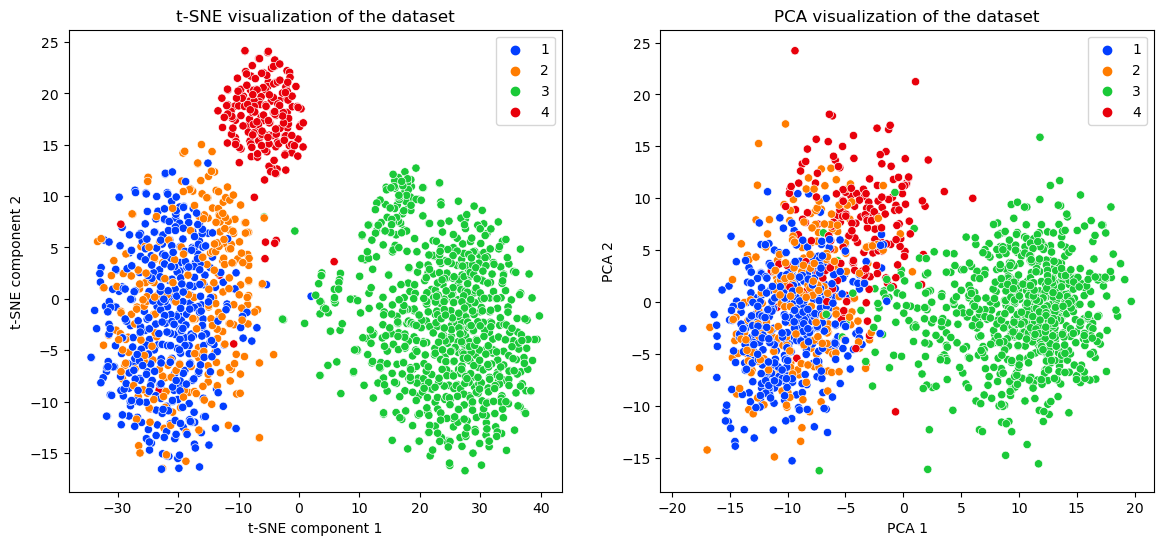

In [102]:
visualize_classes(X_train, y_train)

**Note**: Classes 3 and 4 show good separation, while 1 and 2 are not well-separated  
**Expectations**:  
- Simple models will perform poorly, especially on classes 1 and 2

### Implement classification

In [37]:
# import classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Linear Discriminant Analysis
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
# from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.svm import SVC  # Support Vector Machine

# import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

Construct functions for accuracy evaluation

In [67]:
def get_accuracy(y_pred, y_test):
    return accuracy_score(y_test, y_pred)

def get_precision_recall(y_pred, y_test, average_setting):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average_setting)
    recall = recall_score(y_test, y_pred, average=average_setting)

    return precision, recall

Random Forest - IMPLEMENT CROSS-VALIDATION

In [70]:
rf = RandomForestClassifier(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [79]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8341584158415841
Precision: [0.65562914 0.83333333 0.94444444 1.        ]
Recall: [0.96116505 0.32467532 1.         0.7962963 ]
Classification report:
               precision    recall  f1-score   support

           1       0.66      0.96      0.78       103
           2       0.83      0.32      0.47        77
           3       0.94      1.00      0.97       170
           4       1.00      0.80      0.89        54

    accuracy                           0.83       404
   macro avg       0.86      0.77      0.78       404
weighted avg       0.86      0.83      0.82       404



Logistic Regression

In [81]:
lr = LogisticRegression(random_state=1234, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [82]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.948019801980198
Precision: [0.88679245 0.87837838 1.         1.        ]
Recall: [0.91262136 0.84415584 1.         1.        ]
Classification report:
               precision    recall  f1-score   support

           1       0.89      0.91      0.90       103
           2       0.88      0.84      0.86        77
           3       1.00      1.00      1.00       170
           4       1.00      1.00      1.00        54

    accuracy                           0.95       404
   macro avg       0.94      0.94      0.94       404
weighted avg       0.95      0.95      0.95       404



KNN - IMPLEMENT CROSS-VALIDATION

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [86]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8787128712871287
Precision: [0.7295082  0.73333333 1.         1.        ]
Recall: [0.86407767 0.57142857 1.         0.96296296]
Classification report:
               precision    recall  f1-score   support

           1       0.73      0.86      0.79       103
           2       0.73      0.57      0.64        77
           3       1.00      1.00      1.00       170
           4       1.00      0.96      0.98        54

    accuracy                           0.88       404
   macro avg       0.87      0.85      0.85       404
weighted avg       0.88      0.88      0.88       404



Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

In [87]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8787128712871287
Precision: [0.7295082  0.73333333 1.         1.        ]
Recall: [0.86407767 0.57142857 1.         0.96296296]
Classification report:
               precision    recall  f1-score   support

           1       0.73      0.86      0.79       103
           2       0.73      0.57      0.64        77
           3       1.00      1.00      1.00       170
           4       1.00      0.96      0.98        54

    accuracy                           0.88       404
   macro avg       0.87      0.85      0.85       404
weighted avg       0.88      0.88      0.88       404



Support Vector Machine

In [96]:
svm = SVC(kernel='linear', random_state=1234)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [97]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.943069306930693
Precision: [0.87735849 0.86486486 1.         1.        ]
Recall: [0.90291262 0.83116883 1.         1.        ]
Classification report:
               precision    recall  f1-score   support

           1       0.88      0.90      0.89       103
           2       0.86      0.83      0.85        77
           3       1.00      1.00      1.00       170
           4       1.00      1.00      1.00        54

    accuracy                           0.94       404
   macro avg       0.94      0.93      0.93       404
weighted avg       0.94      0.94      0.94       404



Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [98]:
average_setting = None
print("Accuracy:",get_accuracy(y_pred, y_test))
precision, recall = get_precision_recall(y_pred, y_test, average_setting)
print(f"Precision: {precision}\nRecall: {recall}")
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.943069306930693
Precision: [0.87735849 0.86486486 1.         1.        ]
Recall: [0.90291262 0.83116883 1.         1.        ]
Classification report:
               precision    recall  f1-score   support

           1       0.88      0.90      0.89       103
           2       0.86      0.83      0.85        77
           3       1.00      1.00      1.00       170
           4       1.00      1.00      1.00        54

    accuracy                           0.94       404
   macro avg       0.94      0.93      0.93       404
weighted avg       0.94      0.94      0.94       404

